# 1. Importing libraries

In [83]:
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from textblob import TextBlob 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pandas as pd
#from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter 
import seaborn as sns
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Accessing csv file with tweets

In [91]:
df = pd.read_csv('tweets.csv',encoding='latin-1')
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 3.1 Data pre-preprocessing

In [92]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.loc[df['sentiment'] == 4, 'sentiment'] = 1
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# 3.2 Data preprocessing - Natural language processing (stopwords removal and lemmatization)  

In [93]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
clean_chars = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+|\b\w*\d\w*\b"

In [94]:
def preprocess(text, stem=False):
    
    text = re.sub(clean_chars, ' ', str(text).lower())
    text = text.strip()
    #print(text)
    tokens = []
    for word in text.split():
        if word not in stop_words:
            if stem: #checks whether stemmization is possible
                tokens.append(stemmer.stem(word))
            else:
                tokens.append(word)
    return " ".join(tokens)

In [95]:
df.text = df.text.apply(lambda x: preprocess(x))
df.head()
#df.text = df.text.apply(preprocess)

,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see


# 4. Most often occuring words

In [96]:
positive_tweets = df[df.sentiment == 1]
negative_tweets = df[df.sentiment == 0]

Text(0.5, 1.0, 'Top 15 Most Occurring Words in Positive Tweets')

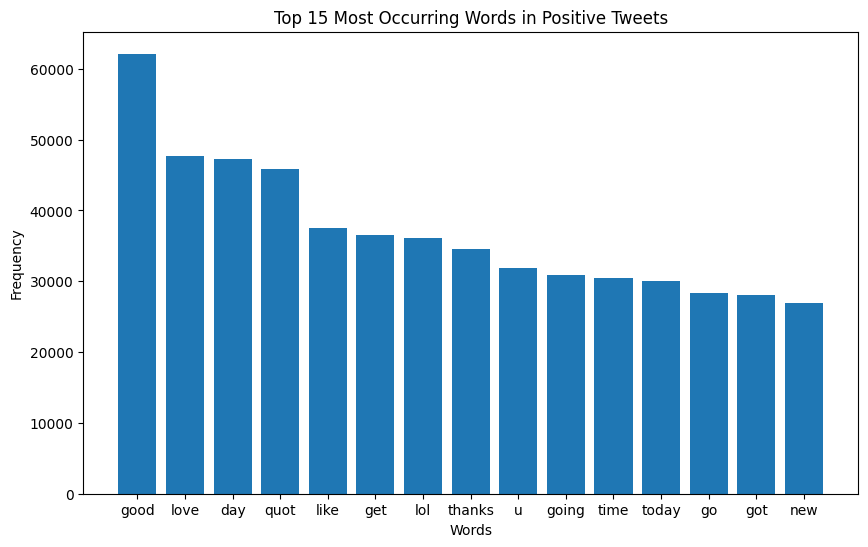

In [97]:
pos_words = " ".join(positive_tweets.text)
pos_words = pos_words.split() 

pos_words_freq = Counter(pos_words)

most_occur = pos_words_freq.most_common(15) 
words, frequencies = zip(*most_occur)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Occurring Words in Positive Tweets')


Text(0.5, 1.0, 'Top 15 Most Occurring Words in negative Tweets')

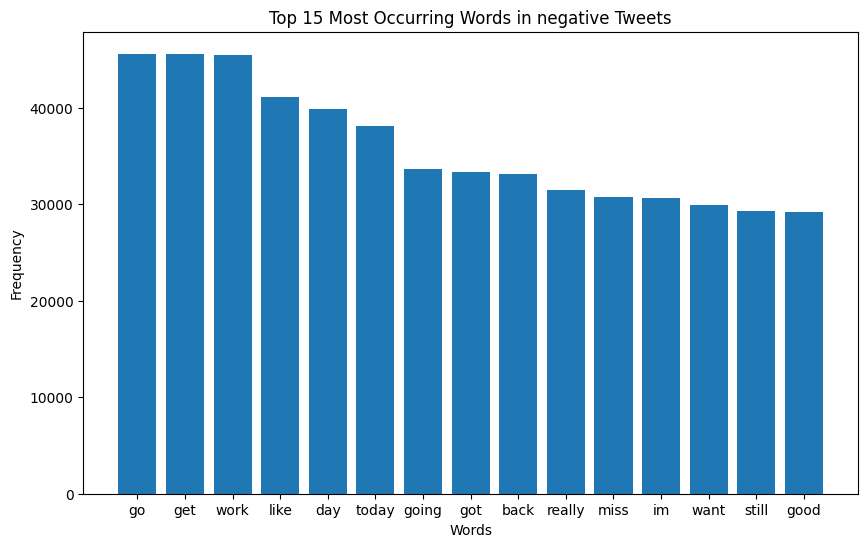

In [98]:
neg_words = " ".join(negative_tweets.text)
neg_words = neg_words.split() 

neg_words_freq = Counter(neg_words)
most_occur2 = neg_words_freq.most_common(15)
words2, frequencies2 = zip(*most_occur2)
plt.figure(figsize=(10, 6))
plt.bar(words2, frequencies2)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Occurring Words in negative Tweets')

Text(0.5, 1.0, 'Top 15 least Occurring Words in negative Tweets')

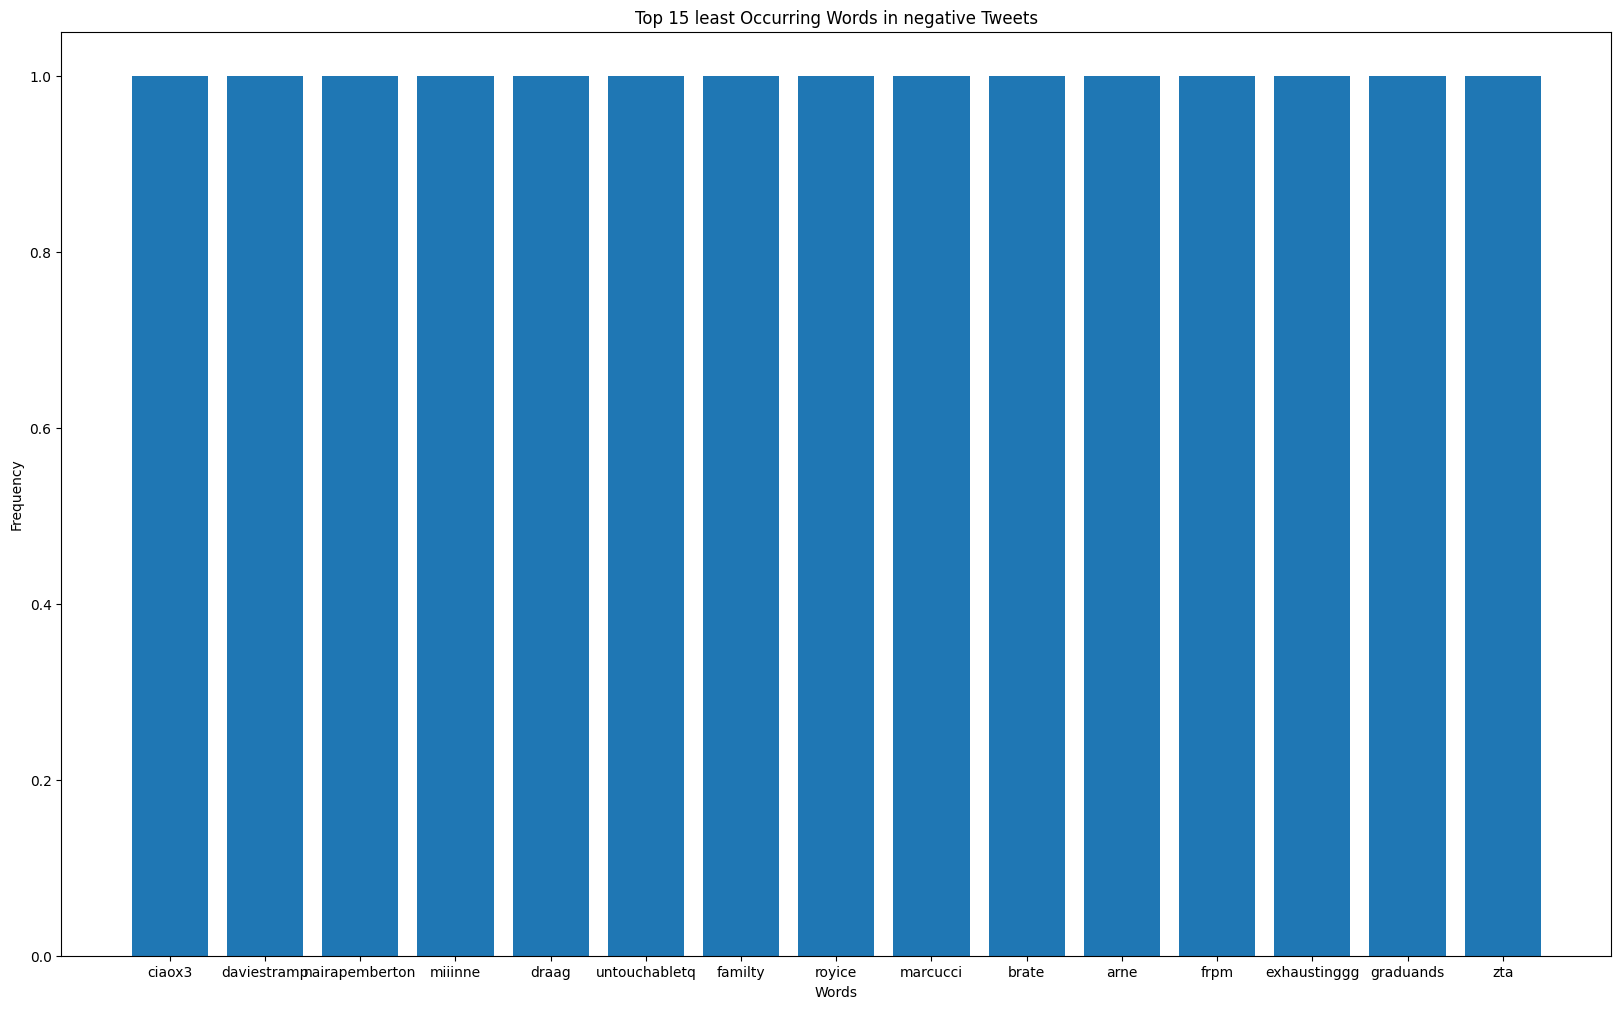

In [99]:
neg_words = " ".join(negative_tweets.text)
neg_words = neg_words.split() 

neg_words_freq = Counter(neg_words)
most_occur2 = neg_words_freq.most_common()[-15:] 
words2, frequencies2 = zip(*most_occur2)
plt.figure(figsize=(20, 12))
plt.bar(words2, frequencies2)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 least Occurring Words in negative Tweets')

# 5. Naive bayes - first prototype

In [63]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000000)
X = tfidf_vectorizer.fit_transform(df['text'])


In [64]:

print(df['text'][1])
print(X[1])
print(df['text'][26])
print(X[26])


upset update facebook texting might cry result school today also blah
  (0, 40625)	0.34868518861646286
  (0, 18295)	0.2608224540971422
  (0, 297554)	0.18023594674753374
  (0, 257017)	0.2327251599351616
  (0, 246168)	0.3819972916470437
  (0, 72316)	0.29789032648575897
  (0, 191828)	0.2637782746404362
  (0, 291135)	0.373771138929043
  (0, 101536)	0.2977918624016447
  (0, 310418)	0.2992318837129455
  (0, 310663)	0.31871642044349335
going cry sleep watching marley
  (0, 184933)	0.6511053734928925
  (0, 318518)	0.3659229239607684
  (0, 268699)	0.3536518742108327
  (0, 120458)	0.29468845036773667
  (0, 72316)	0.4798450535492785


In [100]:
small_dataframe = df.sample(frac=0.00001, random_state=12)
small_part_of_X = tfidf_vectorizer.fit_transform(small_dataframe['text'])
print(small_dataframe)

         sentiment                                               text
889171           1                                        thanks info
1549553          1                                              voted
1554662          1     ugh cant vote im totally rooting twilight demi
459019           0                moving cattle across road smell cow
939375           1  made first connection honolulu hawaii via beeh...
1233013          1                        beat worked already slackin
1310688          1  ugh wanted bed ago give pedi work tom goodnigh...
1406144          1  belmont today exciting think going hop board c...
20797            0                             lost 5 followers wrong
502457           0  got phone matthewcostner whole weeks apart thi...
1303515          1  got lovely postcard bff kenneth still waiting ...
613476           0                                    rain needs stop
879062           1  mistygirlph zaidah1 adamsconsulting scarletman...
1093913          1  

In [66]:
tfidf_df = pd.DataFrame(data=small_part_of_X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [67]:
print(tfidf_df)

      across  adamsconsulting       ago     aloha   already   america   
0   0.000000          0.00000  0.000000  0.000000  0.000000  0.000000  \
1   0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
2   0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
3   0.408248          0.00000  0.000000  0.000000  0.000000  0.000000   
4   0.000000          0.00000  0.000000  0.320118  0.000000  0.000000   
5   0.000000          0.00000  0.000000  0.000000  0.449213  0.000000   
6   0.000000          0.00000  0.269597  0.000000  0.000000  0.000000   
7   0.000000          0.00000  0.000000  0.000000  0.000000  0.288675   
8   0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
9   0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
10  0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
11  0.000000          0.00000  0.000000  0.000000  0.000000  0.000000   
12  0.000000          0.27735  0.000000  0.000000  

In [68]:
y = df['sentiment']


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 6. Model evaluation

In [71]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.75      0.78      0.76    159835
           1       0.77      0.75      0.76    160165

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



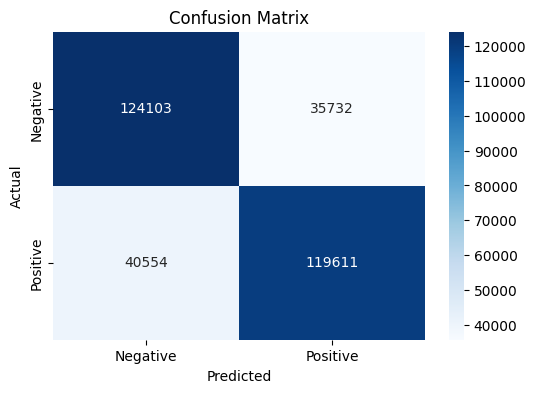

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

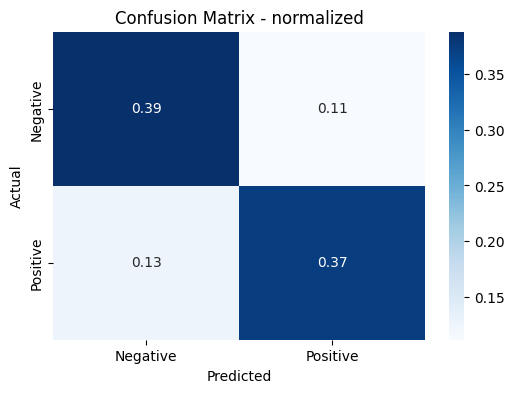

In [73]:

conf_matrix_normalised = confusion_matrix(y_test, y_pred, normalize = 'all')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_normalised, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - normalized')
plt.show()